### Content

In [2]:
import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_path = '../data/'

In [4]:
train = pd.read_csv(os.path.join(data_path, 'aug_train.csv'))
test = pd.read_csv(os.path.join(data_path, 'aug_test.csv'))

In [5]:
print(f'Train shape: {train.shape}')
print(f'Test shape: {test.shape}')

Train shape: (19158, 14)
Test shape: (2129, 13)


In [6]:
train.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [8]:
train.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [9]:
print(f'Train target disbalance: \n{train.target.value_counts()}')

Train target disbalance: 
0.0    14381
1.0     4777
Name: target, dtype: int64


### Make merged dataset for future purpose

In [10]:
first_subset = train.copy()
second_subset = test.copy()

first_subset.drop(['target'], axis=1, inplace=True)

first_subset['subset'] = 'train'
second_subset['subset'] = 'test'


df = pd.concat([first_subset, second_subset], axis=0)
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,subset
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,train
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,train
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,train
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,train
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15,test
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30,test
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18,test
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84,test


### enrollee_id

In [11]:
print(f'Unique enrollee_id count: {train.enrollee_id.nunique()}')
print(f'Unique enrollee_id count: {test.enrollee_id.nunique()}')

if train.enrollee_id.nunique() == train.shape[0] and test.enrollee_id.nunique() == test.shape[0]:
    print('All values of column is unique.')

Unique enrollee_id count: 19158
Unique enrollee_id count: 2129
All values of column is unique.


### city

Number of cities: 123


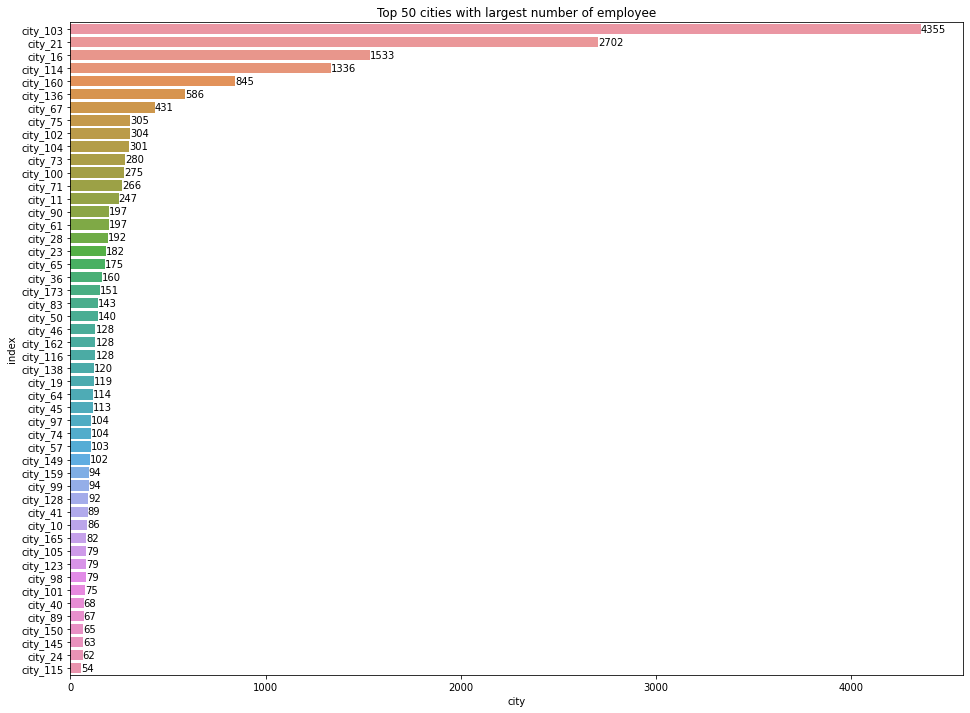

In [12]:
print(f'Number of cities: {train.city.nunique()}')

group = train.city.value_counts().reset_index()

n = 50
assert n <= group.shape[0], f'n value must be less or equal to {group.shape[0]}'

fig, ax = plt.subplots(figsize=(16, n//4))
ax.set_title(f'Top {n} cities with largest number of employee')
bar = sns.barplot(data=group[:n], x='city', y='index', ax=ax)
plt.bar_label(bar.containers[0])

plt.show()

### city_development_index

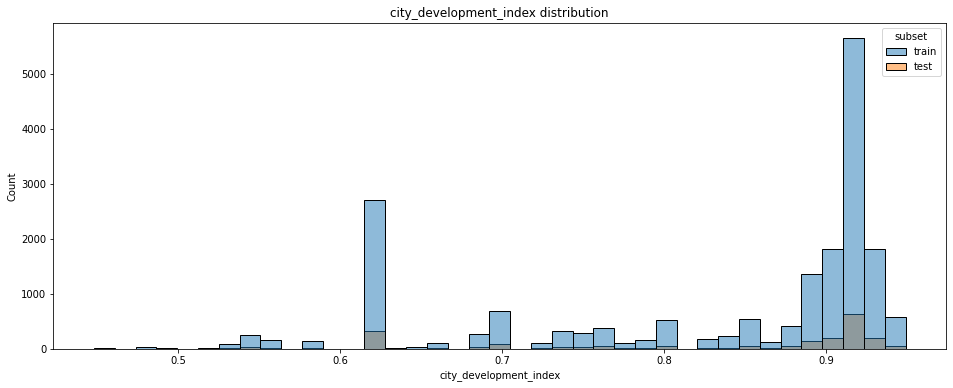

In [13]:
fig, ax = plt.subplots(figsize=(16,6))

ax.set_title('city_development_index distribution')
sns.histplot(data=df, x='city_development_index', hue='subset', ax=ax)
plt.show()

### gender

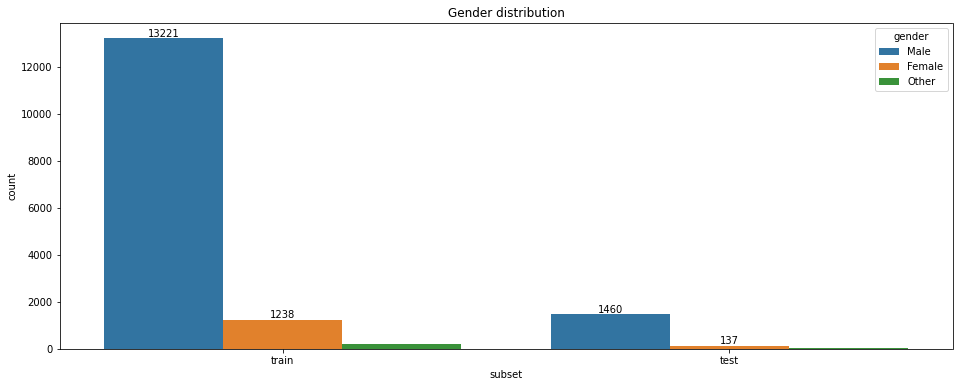

In [14]:
fig, ax = plt.subplots(figsize=(16, 6))

ax.set_title('Gender distribution')
cnt = sns.countplot(data=df, x='subset', hue='gender', ax=ax)
plt.bar_label(cnt.containers[0])
plt.bar_label(cnt.containers[1])
plt.show()

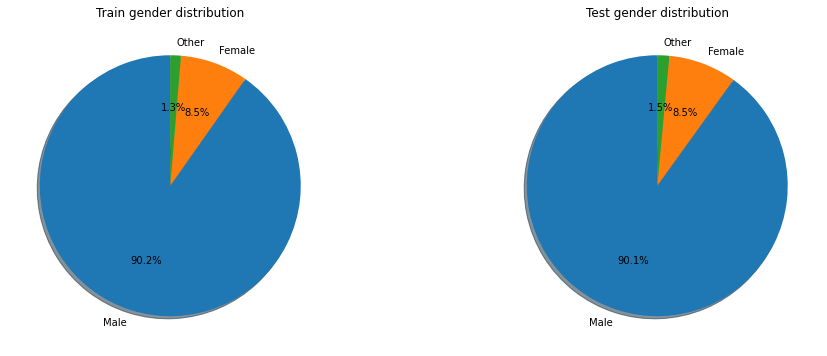

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

gender_cnt_train = train.gender.value_counts().values
gender_cnt_test = test.gender.value_counts().values
labels = train.gender.value_counts().index

axs[0].set_title('Train gender distribution')
axs[0].pie(gender_cnt_train, autopct='%1.1f%%', labels=labels,
        shadow=True, startangle=90)

axs[1].set_title('Test gender distribution')
axs[1].pie(gender_cnt_test, autopct='%1.1f%%', labels=labels,
        shadow=True, startangle=90)

plt.show()

### relevent_experience

In [16]:
print(f'Number of categories (train): {train.relevent_experience.nunique()}')
print(f'Number of categories (test): {test.relevent_experience.nunique()}')

Number of categories (train): 2
Number of categories (test): 2


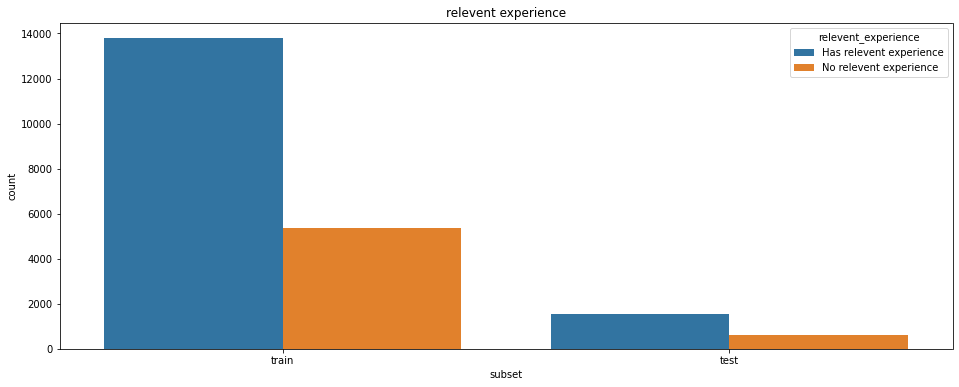

In [17]:
fig, ax = plt.subplots(figsize=(16,6))

ax.set_title('relevent experience')
cnt = sns.countplot(data=df, x='subset', hue='relevent_experience')

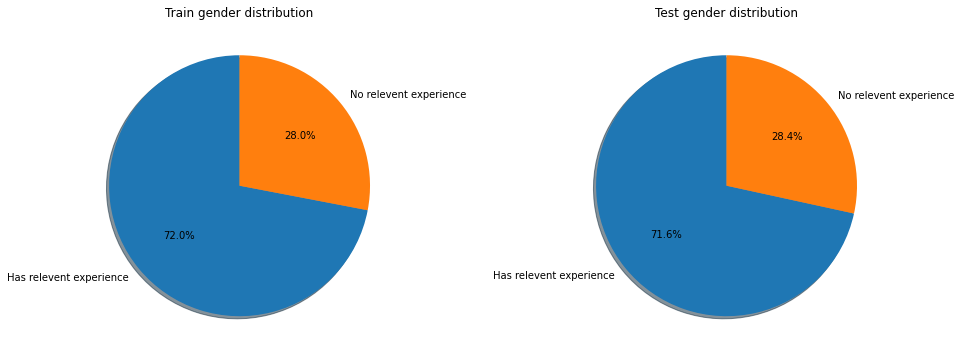

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

relevent_train = train.relevent_experience.value_counts().values
relevent_test = test.relevent_experience.value_counts().values
labels = train.relevent_experience.value_counts().index

axs[0].set_title('Train gender distribution')
axs[0].pie(relevent_train, autopct='%1.1f%%', labels=labels,
        shadow=True, startangle=90)

axs[1].set_title('Test gender distribution')
axs[1].pie(relevent_test, autopct='%1.1f%%', labels=labels,
        shadow=True, startangle=90)

plt.show()

### enrolled_university

In [19]:
print(f'Number of categories (train): {train.enrolled_university.nunique()}')
print(f'Number of categories (test): {test.enrolled_university.nunique()}')

Number of categories (train): 3
Number of categories (test): 3


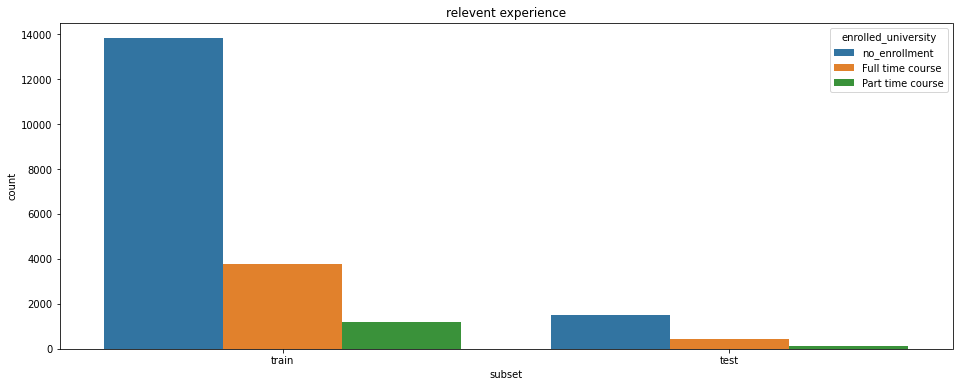

In [20]:
fig, ax = plt.subplots(figsize=(16,6))

ax.set_title('relevent experience')
cnt = sns.countplot(data=df, x='subset', hue='enrolled_university')

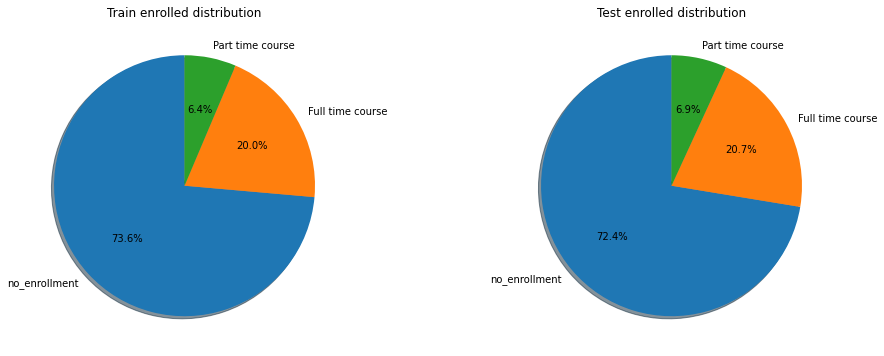

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

enrolled_train = train.enrolled_university.value_counts().values
enrolled_test = test.enrolled_university.value_counts().values
labels = train.enrolled_university.value_counts().index

axs[0].set_title('Train enrolled distribution')
axs[0].pie(enrolled_train, autopct='%1.1f%%', labels=labels,
        shadow=True, startangle=90)

axs[1].set_title('Test enrolled distribution')
axs[1].pie(enrolled_test, autopct='%1.1f%%', labels=labels,
        shadow=True, startangle=90)

plt.show()

### education_level

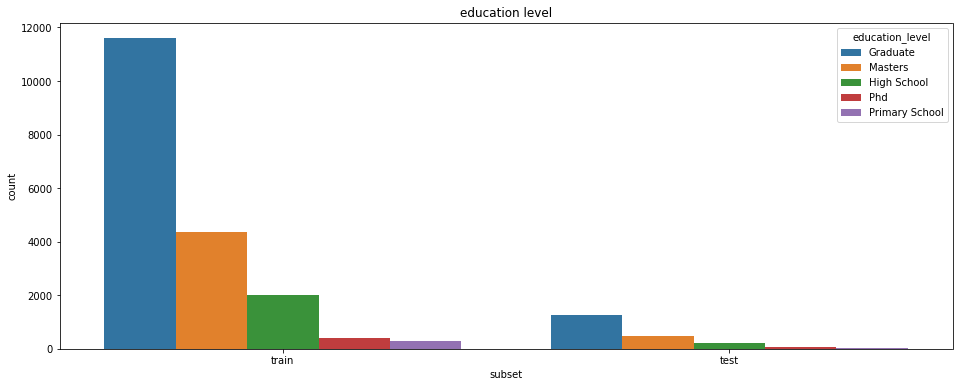

In [22]:
fig, ax = plt.subplots(figsize=(16,6))

ax.set_title('education level')
cnt = sns.countplot(data=df, x='subset', hue='education_level')

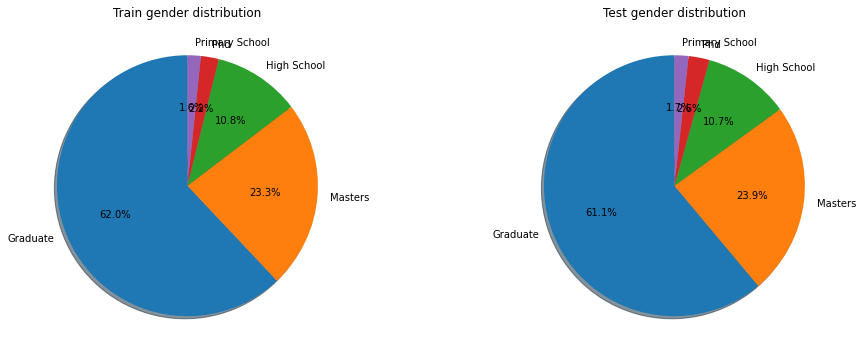

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

education_train = train.education_level.value_counts().values
education_test = test.education_level.value_counts().values
labels = train.education_level.value_counts().index

axs[0].set_title('Train gender distribution')
axs[0].pie(education_train, autopct='%1.1f%%', labels=labels,
        shadow=True, startangle=90)

axs[1].set_title('Test gender distribution')
axs[1].pie(education_test, autopct='%1.1f%%', labels=labels,
        shadow=True, startangle=90)

plt.show()

### major_discipline

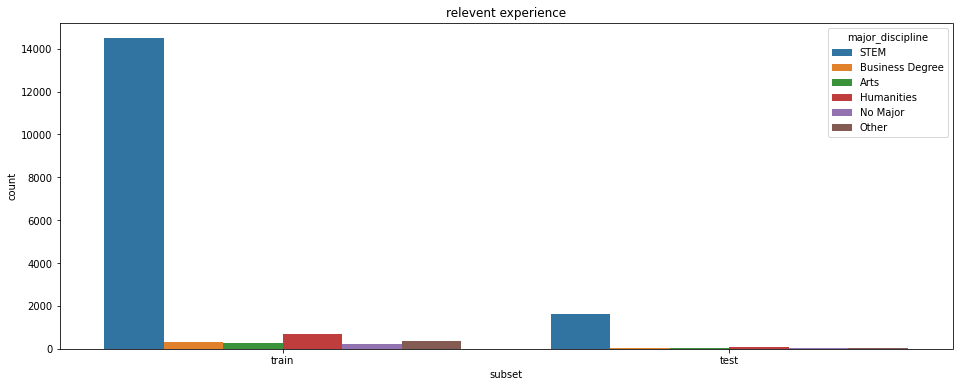

In [24]:
fig, ax = plt.subplots(figsize=(16,6))

ax.set_title('relevent experience')
cnt = sns.countplot(data=df, x='subset', hue='major_discipline')

### experience

In [25]:
df.experience.nunique()

22

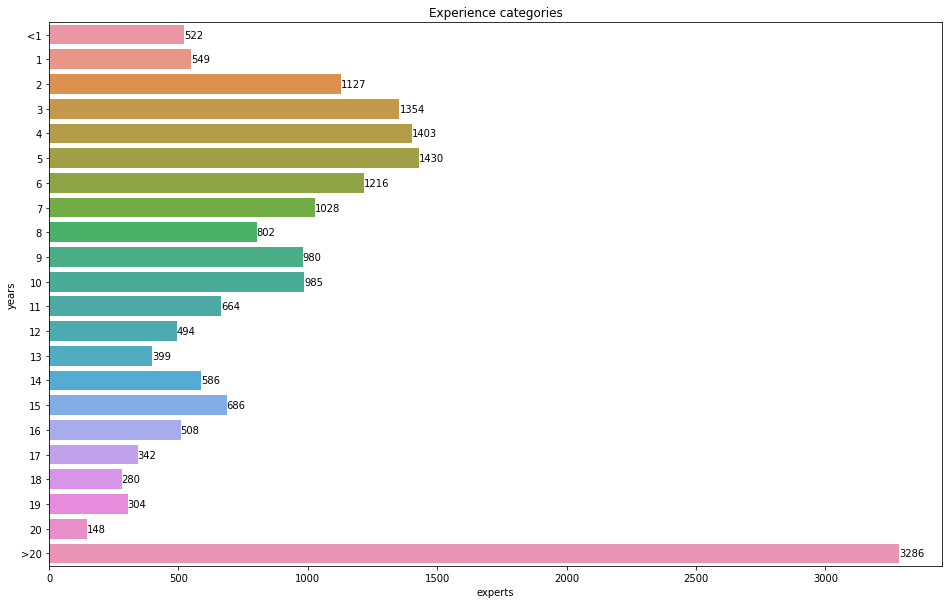

In [26]:
group = train.experience.value_counts().reset_index()
group.columns = ['years', 'experts']
group.sort_values(by=['years'],
                  key=lambda x: x.map(lambda x: x.replace('<', '-').replace('>', '1')).astype('int'),
                  inplace=True)

fig, ax = plt.subplots(figsize=(16, 10))
ax.set_title(f'Experience categories')
bar = sns.barplot(data=group, x='experts', y='years', ax=ax)
plt.bar_label(bar.containers[0])

plt.show()

### company_size

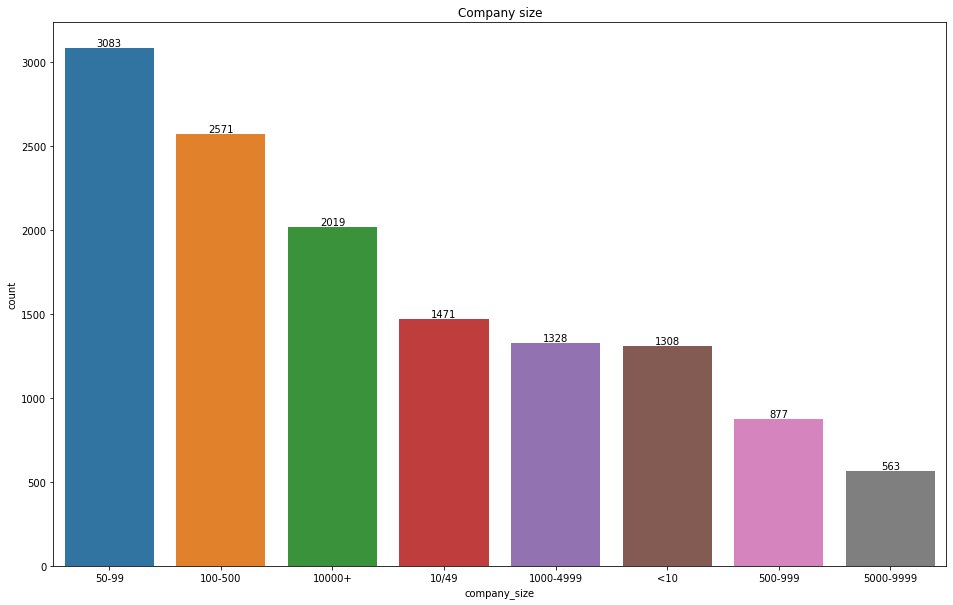

In [27]:
group = train.company_size.value_counts().reset_index()
group.columns = ['company_size', 'count']

fig, ax = plt.subplots(figsize=(16, 10))
ax.set_title(f'Company size')
bar = sns.barplot(data=group, x='company_size', y='count', ax=ax)
plt.bar_label(bar.containers[0])

plt.show()

### company_type

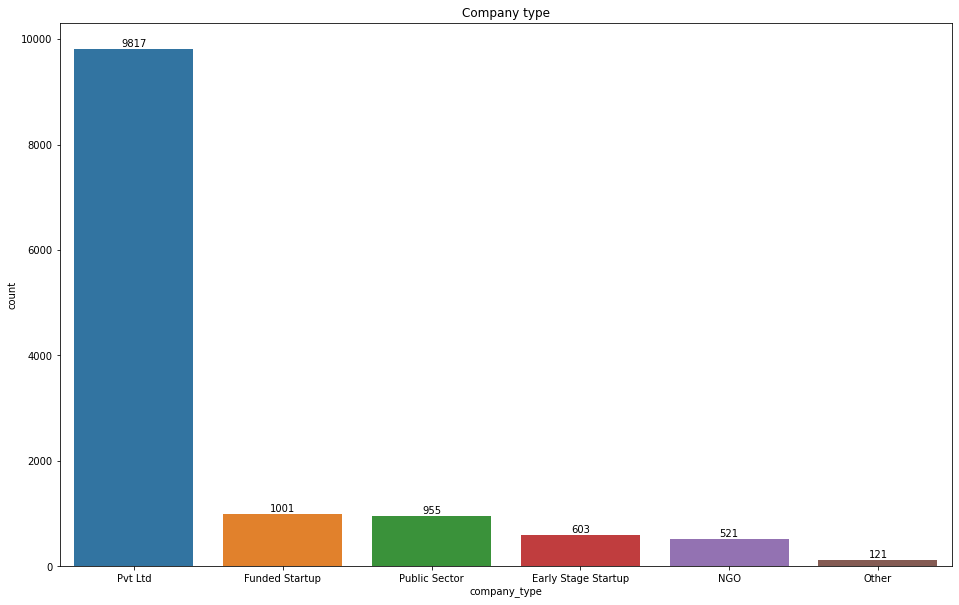

In [28]:
group = train.company_type.value_counts().reset_index()
group.columns = ['company_type', 'count']

fig, ax = plt.subplots(figsize=(16, 10))
ax.set_title(f'Company type')
bar = sns.barplot(data=group, x='company_type', y='count', ax=ax)
plt.bar_label(bar.containers[0])

plt.show()

### last_new_job

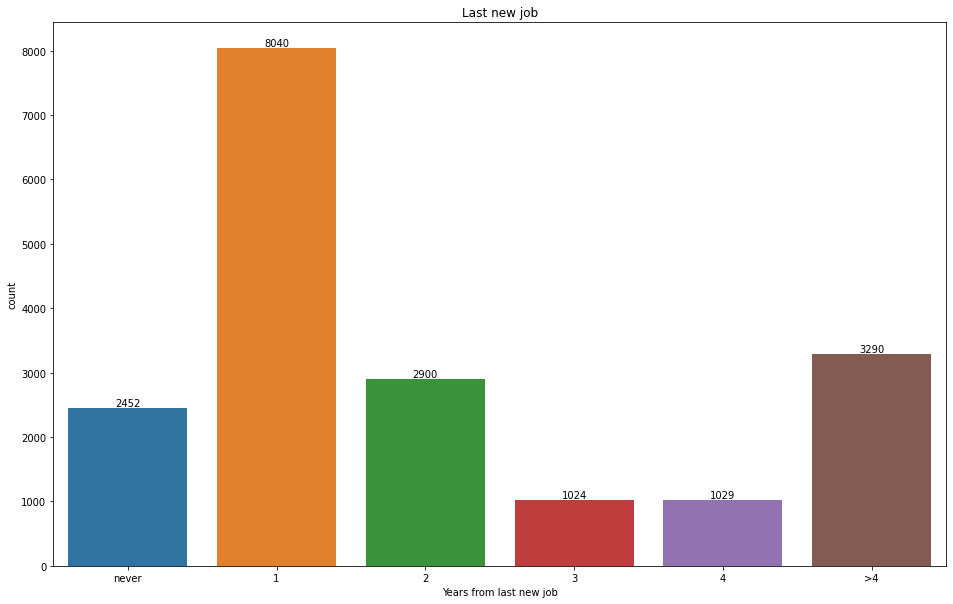

In [29]:
group = train.last_new_job.value_counts().reset_index()
group.columns = ['last_new_job', 'count']
group.sort_values(by=['last_new_job'],
                  key=lambda x: x.map(lambda x: x.replace('never', '0').replace('>', '1')).astype('int'),
                  inplace=True)

fig, ax = plt.subplots(figsize=(16, 10))
ax.set_title(f'Last new job')
bar = sns.barplot(data=group, x='last_new_job', y='count', ax=ax)
plt.bar_label(bar.containers[0])
ax.set_xlabel('Years from last new job')

plt.show()

### training_hours

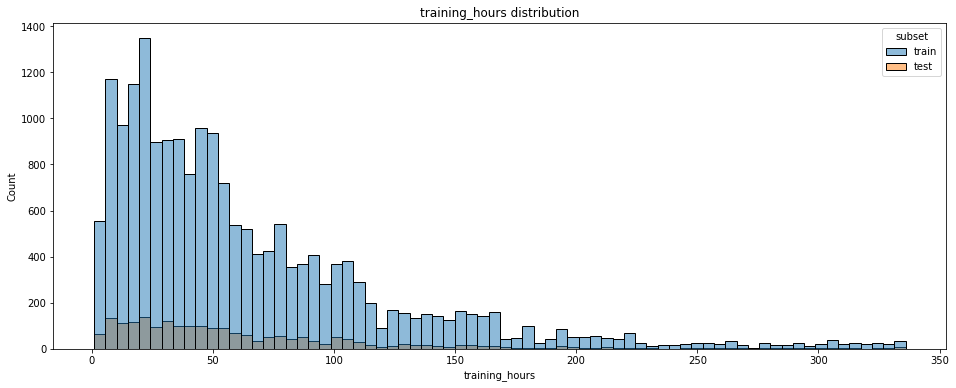

In [30]:
fig, ax = plt.subplots(figsize=(16,6))

ax.set_title('training_hours distribution')
sns.histplot(data=df, x='training_hours', hue='subset', ax=ax)
plt.show()

### target

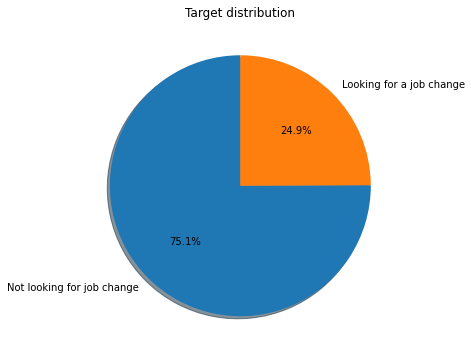

In [31]:
fig, ax = plt.subplots(figsize=(16, 6))

group = train.target.value_counts()
labels = ['Not looking for job change', 'Looking for a job change']

ax.set_title('Target distribution')
ax.pie(group, autopct='%1.1f%%', labels=labels,
        shadow=True, startangle=90)


plt.show()